In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_excel('Dataset/Dataset.xlsx',
                          sheet_name=0,
                          header=0,
                          index_col=False,
                          keep_default_na=True)

In [3]:
customers.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


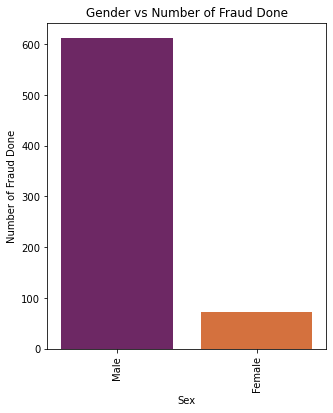

Percentage of Female Fraud Done from Female Insurance Policy Holder 4.06 %
Percentage of Male Fraud Done from Male Insurance Policy Holder 6.27 %


In [7]:
plt.subplots(figsize=(5, 6))
sns.countplot(x='Sex',
              data=customers[customers['FraudFound_P']==1],
              palette='inferno',
              order=customers['Sex'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud Done')
plt.title('Gender vs Number of Fraud Done')

plt.show()

print('Percentage of Female Fraud Done from Female Insurance Policy Holder', format((73/1797)*100, '.2f'), '%')
print('Percentage of Male Fraud Done from Male Insurance Policy Holder', format((612/9767)*100, '.2f'), '%')

# Age of policy holder

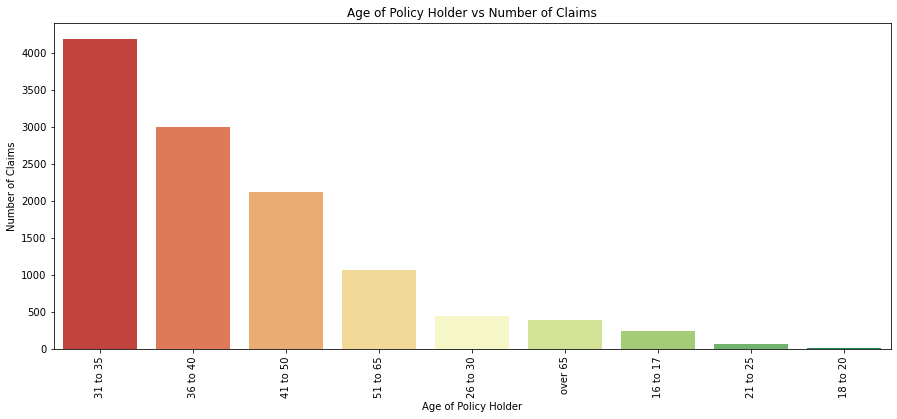

,Age Group,Claims,Percentage-%
0,31 to 35,4199,36.31
1,36 to 40,3008,26.01
2,41 to 50,2122,18.35
3,51 to 65,1070,9.25
4,26 to 30,445,3.85
5,over 65,388,3.35
6,16 to 17,247,2.14
7,21 to 25,73,0.63
8,18 to 20,13,0.11


In [8]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='AgeOfPolicyHolder',
              data=customers,
              palette='RdYlGn',
              order=customers['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder vs Number of Claims')

plt.show()

x = customers['AgeOfPolicyHolder'].value_counts().index
y = np.array(customers['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])

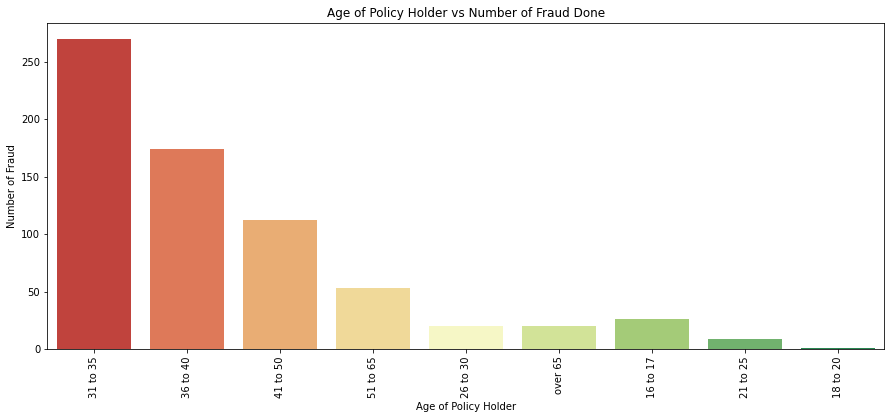

,Age Group,Claims,Percentage-%
0,31 to 35,270,39.42
1,36 to 40,174,25.40
2,41 to 50,112,16.35
3,51 to 65,53,7.74
4,16 to 17,26,3.80
5,over 65,20,2.92
6,26 to 30,20,2.92
7,21 to 25,9,1.31
8,18 to 20,1,0.15


In [9]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AgeOfPolicyHolder',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder vs Number of Fraud Done')

plt.show()

x = customers[customers['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array,columns = ['Age Group', 'Claims', 'Percentage-%'])    

# From above two graph we get that poilcy holder have age greater than 50 year have low chance of doing fraud.

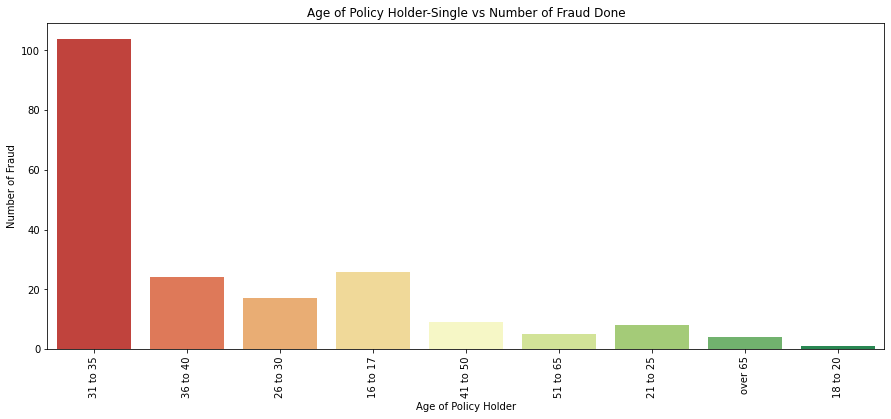

,Age Group,Claims,Percentage-%
0,31 to 35,104,52.53
1,16 to 17,26,13.13
2,36 to 40,24,12.12
3,26 to 30,17,8.59
4,41 to 50,9,4.55
5,21 to 25,8,4.04
6,51 to 65,5,2.53
7,over 65,4,2.02
8,18 to 20,1,0.51


In [10]:
plt.subplots(figsize=(15, 6))
single = customers[customers['MaritalStatus']=='Single']
sns.countplot(x='AgeOfPolicyHolder',
              data=single[single['FraudFound_P']==1],
              palette='RdYlGn',
              order=single['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder-Single vs Number of Fraud Done')

plt.show()

x = single[single['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().index
y = np.array(single[single['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum())*100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])   

## From this graph we can observe that single people having age between 31 to 35 have high chance of fraud

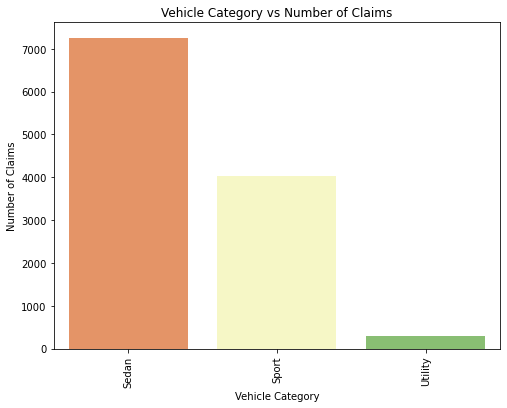

,Vehicle Category,Claims,Percentage-%
0,Sedan,7253,62.72
1,Sport,4024,34.79
2,Utility,288,2.49


In [11]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='VehicleCategory',
              data=customers,
              palette='RdYlGn',
              order=customers['VehicleCategory'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Vehicle Category')
plt.title('Vehicle Category vs Number of Claims')

plt.show()

x = customers['VehicleCategory'].value_counts().index
y = np.array(customers['VehicleCategory'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i],'.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Vehicle Category', 'Claims', 'Percentage-%'])    

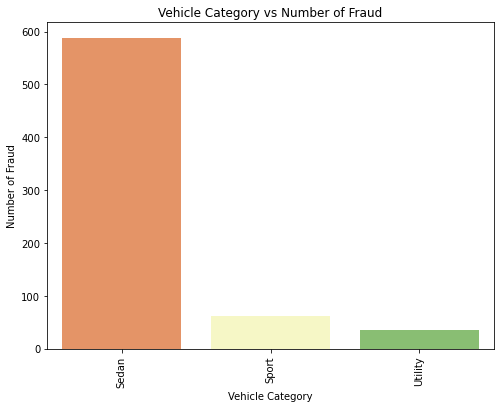

,Vehicle Category,Fraud,Percentage-%
0,Sedan,588,85.84
1,Sport,61,8.91
2,Utility,36,5.26


In [12]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='VehicleCategory',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['VehicleCategory'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Vehicle Category')
plt.title('Vehicle Category vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['VehicleCategory'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['VehicleCategory'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Vehicle Category', 'Fraud', 'Percentage-%'])   

In [ ]:
customers.columns

In [ ]:
customers['PolicyType'].value_counts()

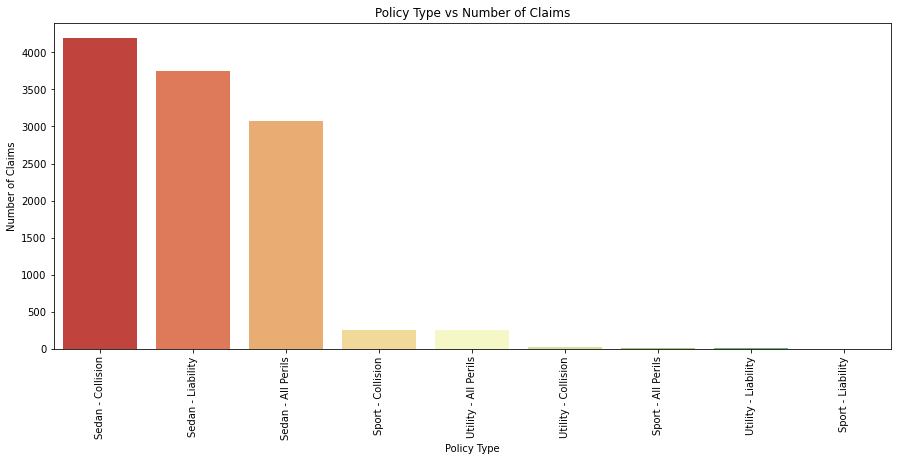

,PolicyType,Claims,Percentage-%
0,Sedan - Collision,4186,36.20
1,Sedan - Liability,3742,32.36
2,Sedan - All Perils,3067,26.52
3,Sport - Collision,262,2.27
4,Utility - All Perils,251,2.17
5,Utility - Collision,24,0.21
6,Sport - All Perils,19,0.16
7,Utility - Liability,13,0.11
8,Sport - Liability,1,0.01


In [13]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='PolicyType',
              data=customers,
              palette='RdYlGn',
              order=customers['PolicyType'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Policy Type')
plt.title('Policy Type vs Number of Claims')

plt.show()

x = customers['PolicyType'].value_counts().index
y = np.array(customers['PolicyType'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['PolicyType', 'Claims', 'Percentage-%'])   

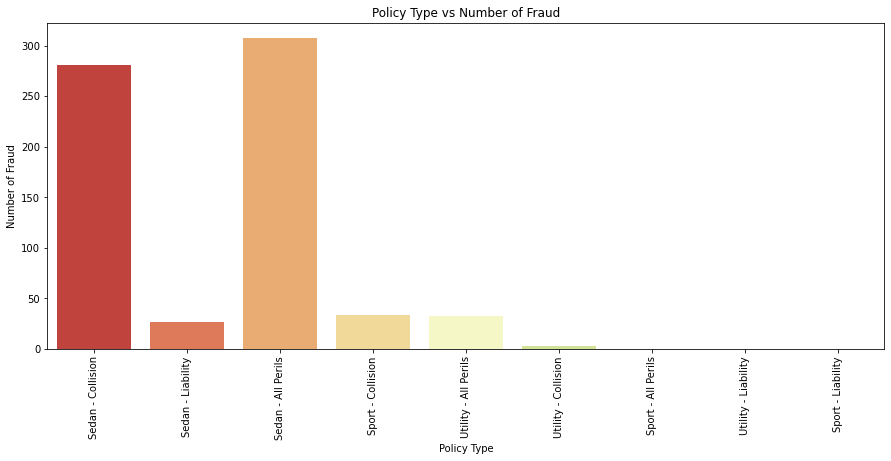

,PolicyType,Fraud,Percentage-%
0,Sedan - All Perils,307,44.82
1,Sedan - Collision,281,41.02
2,Sport - Collision,34,4.96
3,Utility - All Perils,33,4.82
4,Sedan - Liability,27,3.94
5,Utility - Collision,3,0.44


In [14]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='PolicyType',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['PolicyType'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Policy Type')
plt.title('Policy Type vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['PolicyType'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['PolicyType'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['PolicyType', 'Fraud', 'Percentage-%'])   

## From this two graph we can see their more chance of fraud for people having policy type All Perlis and Car Type Sedan or Utility

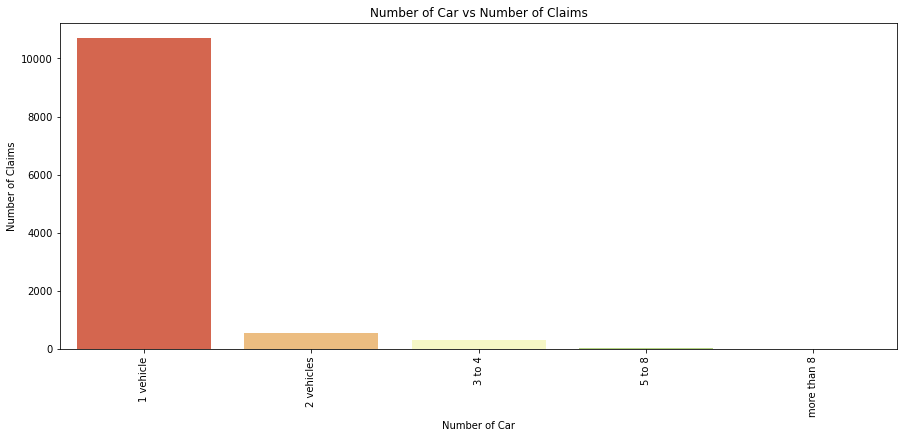

,Number of car,Claims,Percentage-%
0,1 vehicle,10698,92.50
1,2 vehicles,559,4.83
2,3 to 4,288,2.49
3,5 to 8,19,0.16
4,more than 8,1,0.01


In [15]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='NumberOfCars',
              data=customers,
              palette='RdYlGn',
              order=customers['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Number of Car')
plt.title('Number of Car vs Number of Claims')

plt.show()

x = customers['NumberOfCars'].value_counts().index
y = np.array(customers['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum())*100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of car', 'Claims', 'Percentage-%'])   

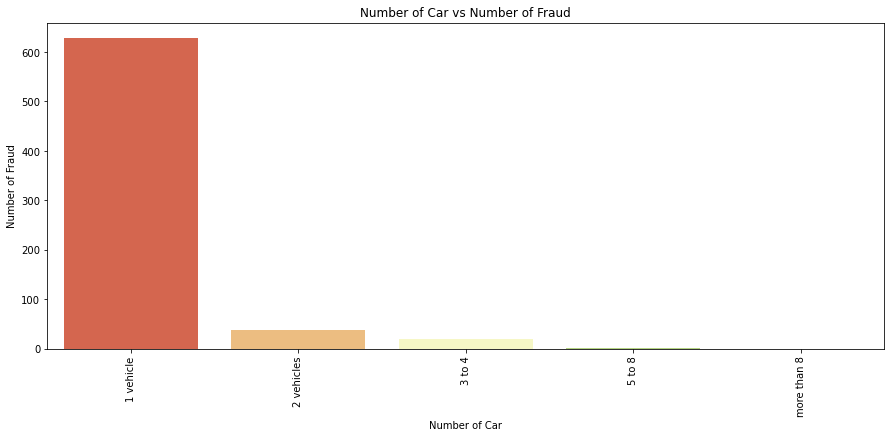

,Number of Car,Fraud,Percentage-%
0,1 vehicle,628,91.68
1,2 vehicles,37,5.40
2,3 to 4,19,2.77
3,5 to 8,1,0.15


In [16]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='NumberOfCars',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Number of Car')
plt.title('Number of Car vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['NumberOfCars'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of Car', 'Fraud', 'Percentage-%'])   

In [ ]:
customers[customers['FraudFound_P']==1]['PolicyType'].value_counts()

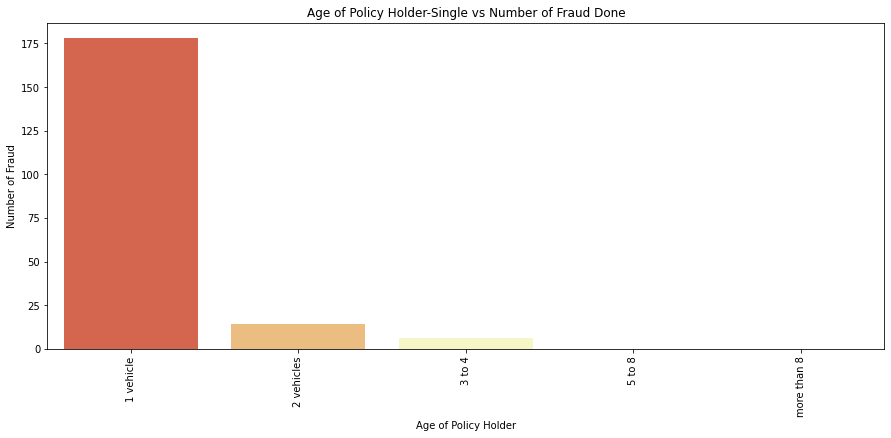

,Age Group,Claims,Percentage-%
0,1 vehicle,178,89.90
1,2 vehicles,14,7.07
2,3 to 4,6,3.03


In [17]:
plt.subplots(figsize=(15, 6))
single = customers[customers['MaritalStatus']=='Single']
sns.countplot(x='NumberOfCars',
              data=single[single['FraudFound_P']==1],
              palette='RdYlGn',
              order=single['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder-Single vs Number of Fraud Done')

plt.show()

x = single[single['FraudFound_P']==1]['NumberOfCars'].value_counts().index
y = np.array(single[single['FraudFound_P']==1]['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])    

## Claims Amount i.e vehicle price || claim size percent

In [18]:
customers['VehiclePrice'].value_counts()

20000 to 29000     6112
30000 to 39000     2640
more than 69000    1605
less than 20000     800
40000 to 59000      349
60000 to 69000       59
Name: VehiclePrice, dtype: int64

In [20]:
customers.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [21]:
vehicle_price_dict = {
    'less than 20000': 20000,
    '20000 to 29000': 29000,
    '30000 to 39000': 39000,
    '40000 to 59000': 59000,
    '60000 to 69000': 69000,
    'more than 69000': 100000
}

claim_trustability = []

for index, row in customers.iterrows():
    ct = row['ClaimSize']/vehicle_price_dict.get(row['VehiclePrice']) * 100
    claim_trustability.append(ct)
    
customers['Claim_Amount_Percent'] = claim_trustability    

In [22]:
claim_amount_100 = customers[customers['Claim_Amount_Percent']>100]
claim_amount_100['VehiclePrice'].value_counts()

30000 to 39000     1128
20000 to 29000      178
40000 to 59000       76
60000 to 69000       23
less than 20000       5
Name: VehiclePrice, dtype: int64

In [24]:
claim_amount_100.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Claim_Amount_Percent
7,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Liability,103420.785275,356.623397
18,Mar,3,Thursday,Honda,Urban,Thursday,Jun,4,Male,Married,...,No,No,External,more than 5,no change,1 vehicle,1994,Collision,84964.753582,217.858343
21,Mar,2,Friday,Dodge,Urban,Saturday,Mar,2,Male,Married,...,No,No,Internal,none,no change,1 vehicle,1994,Collision,54233.789823,139.061000
35,May,4,Friday,Pontiac,Urban,Friday,May,4,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Liability,52494.337422,134.600865
38,Jun,4,Tuesday,Pontiac,Urban,Tuesday,Jun,4,Male,Single,...,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,58488.924392,149.971601


In [26]:
claim_amount_100[claim_amount_100['FraudFound_P']==1]['VehiclePrice'].value_counts()

30000 to 39000    57
20000 to 29000     9
40000 to 59000     5
Name: VehiclePrice, dtype: int64

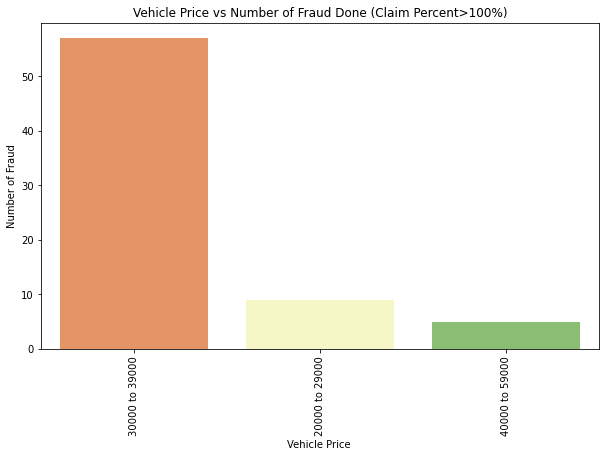

In [25]:
claim_amount_100_vehicle = claim_amount_100[claim_amount_100['VehiclePrice']!='more than 69000']
fraud_claim = claim_amount_100_vehicle[claim_amount_100_vehicle['FraudFound_P']==1]

plt.subplots(figsize=(10, 6))

sns.countplot(x='VehiclePrice',
              data=fraud_claim,
              palette='RdYlGn',
              order=fraud_claim['VehiclePrice'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Vehicle Price ')
plt.title('Vehicle Price vs Number of Fraud Done (Claim Percent>100%)')

plt.show()

# Vehicle having price between 30000 to 39000 and their claim percent is greater than 100% has greater chance of doing fraud

In [27]:
customers['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

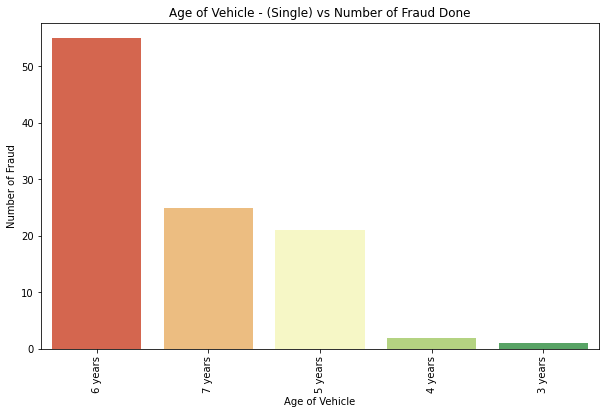

In [28]:
single = customers[customers['MaritalStatus']=='Single']
single = single[single['AgeOfPolicyHolder']=='31 to 35']
fraud = single[single['FraudFound_P']==1]

plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=fraud,
              palette='RdYlGn',
              order=fraud['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle - (Single) vs Number of Fraud Done')

plt.show()

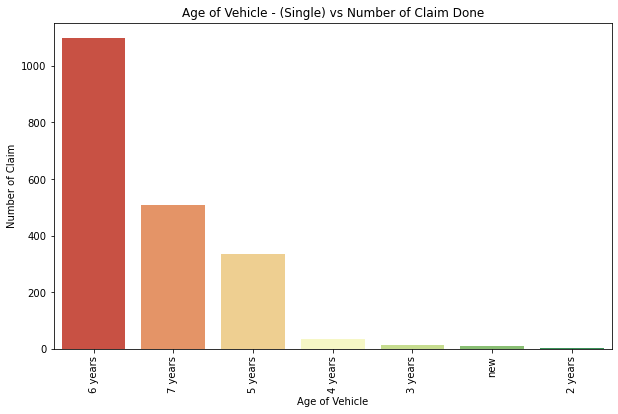

In [29]:
single = customers[customers['MaritalStatus']=='Single']
single = single[single['AgeOfPolicyHolder']=='31 to 35']
fraud = single[single['FraudFound_P']==1]

plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=single,
              palette='RdYlGn',
              order=single['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claim')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle - (Single) vs Number of Claim Done')

plt.show()

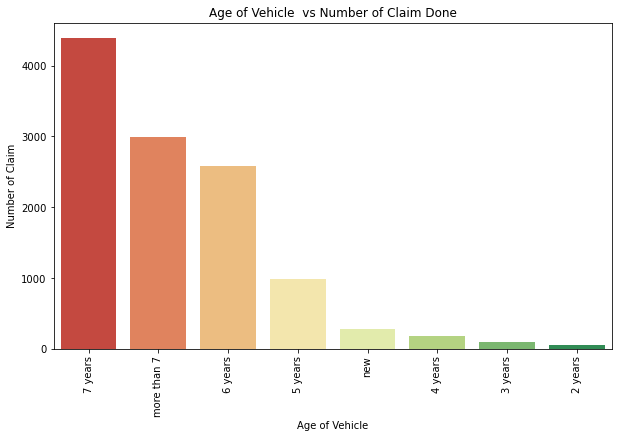

In [30]:
plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=customers,
              palette='RdYlGn',
              order=customers['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claim')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle  vs Number of Claim Done')

plt.show()

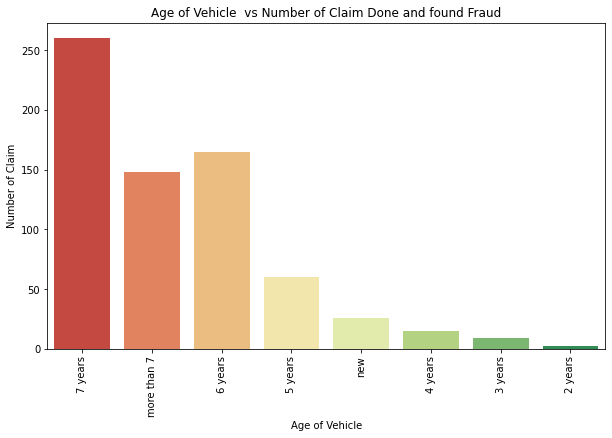

In [32]:
plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claim')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle  vs Number of Claim Done and found Fraud')

plt.show()

In [ ]:
customers['AgeOfVehicle'].value_counts()

In [ ]:
customers[customers['FraudFound_P']==1]['AgeOfVehicle'].value_counts() 

In [ ]:
daydict = {
       1 : 'Monday',
       2 : 'Tuesday',
       3 : 'Wednesday',
       4 : 'Thursday',
       5 : 'Friday',
       6 : 'Saturday',
       7 : 'Sunday'
}

In [ ]:
def parse_date(year, month_name, week_month, day):
    month = month_name
    first_date = datetime(year, month, 1)
    first_day = first_date.isoweekday()
    first_week_number = first_date.isocalendar()[1]
    if (first_week_number==52):
        first_week_number = 1
    week_number = first_week_number + week_month - 1
    string_date = str(year) + '-' + str(week_number) + '-' + daydict.get(day)
    date = datetime.strptime(string_date, '%Y-%U-%A')
    return date

In [ ]:
def convert_month(month):
    
    if month=='Jan':
        return 1
    elif month=='Feb':
        return 2
    elif month=='Mar':
        return 3
    elif month=='Apr':
        return 4
    elif month=='May':
        return 5
    elif month=='Jun':
        return 6
    elif month=='Jul':
        return 7
    elif month=='Aug':
        return 8
    elif month=='Sep':
        return 9
    elif month=='Oct':
        return 10
    elif month=='Nov':
        return 11
    elif month=='Dec':
        return 12
    
customers['Month'] = customers['Month'].apply(convert_month)
customers['MonthClaimed'] = customers['MonthClaimed'].apply(convert_month)  

In [ ]:
def convert_day(day):
    
    if day=='Monday':
        return 1
    elif day=='Tuesday':
        return 2
    elif day=='Wednesday':
        return 3
    elif day=='Thursday':
        return 4
    elif day=='Friday':
        return 5
    elif day=='Saturday':
        return 6
    elif day=='Sunday':
        return 7

customers['DayOfWeek'] = customers['DayOfWeek'].apply(convert_day)
customers['DayOfWeekClaimed'] = customers['DayOfWeekClaimed'].apply(convert_day)   

In [ ]:
customers['Month'].value_counts()

In [ ]:
customers[customers['DayOfWeekClaimed'].isna()]

In [ ]:
customers['DayOfWeekClaimed'].fillna(1, inplace=True)

In [ ]:
customers.isna().sum()

In [ ]:
customers['MonthClaimed'].fillna(7, inplace=True)

In [ ]:
from datetime import datetime, timedelta
gap = []
accident_dates = []
claim_dates = []

for index, row in customers.iterrows():
    accident_year = row['Year']
    claim_year = accident_year if (row['Month'] <= int(row['MonthClaimed'])) else accident_year + 1
    #if (row['Month'] <= int(row['MonthClaimed'])):
    #   claim_year = accident_year
    #else:
    #    claim_year = accident_year + 1
    accident_date = parse_date(accident_year, row['Month'], row['WeekOfMonth'], row['DayOfWeek'])
    claim_date = parse_date(claim_year, int(row['MonthClaimed']), row['WeekOfMonthClaimed'], row['DayOfWeekClaimed'])
    accident_dates.append(accident_date)
    claim_dates.append(claim_date)
    gap.append(abs((claim_date - accident_date).days))

In [ ]:
customers['Claim_Gap']=gap

In [ ]:
customers[customers['WitnessPresent']=='Yes'].shape

In [ ]:
claim_gap_30 = customers[customers['Claim_Gap']>10]
print(claim_gap_30.shape)
print(claim_gap_30[claim_gap_30['FraudFound_P']==1].shape)

In [ ]:
customers.head()

In [ ]:
customers['AddressChange_Claim'].value_counts()

In [ ]:
customers[customers['FraudFound_P']==1]['AddressChange_Claim'].value_counts()

In [ ]:
customers['NumberOfSuppliments'].value_counts()

In [ ]:
customers[customers['FraudFound_P']==1]['NumberOfSuppliments'].value_counts()

In [ ]:
customers['AgentType'].value_counts()

In [ ]:
customers[customers['FraudFound_P']==1]['AgentType'].value_counts()

In [ ]:
customers['PoliceReportFiled'].value_counts()

In [ ]:
customers['WitnessPresent'].value_counts()

In [ ]:
customers[(customers['WitnessPresent']=='Yes') & (customers['PoliceReportFiled']=='Yes')]['FraudFound_P']

In [ ]:
customers[customers['FraudFound_P']==1]['PoliceReportFiled'].value_counts()

In [ ]:
customers[customers['FraudFound_P']==1]['WitnessPresent'].value_counts()